ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **24Sep2018**

# 05. Computational Linear Algebra Fundamentals
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Theory](#theory)
* [Matrix-vector product operations](#product)
* [NumPy and SciPy Linear Algebra](#linalg)
 + [Matrix solve](#solve)
 + [L forward solve](#l)
 + [U forward solve](#u)
 + [LU factorization](#lu)
---

## Theory<a id="theory"></a>
The notes found [here](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/ErfDAD_jL1tHkDrx29w89-MBcOgK4JAnEYSheRoxkL_0sw?e=fpzG5K) cover basic elements of lineary system of algebraic equations. Their representation in row and column formats and the insight gained from them when searching for a solution of the system.

Some basic theoretical aspects of solving for $\xvec$ in the matrix equation $\Amtrx\,\xvec = \bvec$ are covered. $\Amtrx$ is a matrix, $\bvec$ and $\xvec$ are vectors.

## Matrix-vector product operations<a id="product"></a>
The following operations between vectors and matrices are obtained directly from the buil-in functions in the `numpy` package.

In [25]:
'''Import the NumPy package as usual'''

import numpy as np

Scalar product of two vectors: $\avec \cdot \bvec$.

In [26]:
'''Vector scalar product or dot product of vectors'''

a_vec = np.array( np.random.random(3) )
b_vec = np.array( np.random.random(3) )

a_vec_dot_b_vec = np.dot( a_vec, b_vec ) # clear linear algebra operation
print('a.b =', a_vec_dot_b_vec)

a_vec_x_b_vec = a_vec @ b_vec   # consistent linear algebra multiplication
print('a@b =', a_vec_x_b_vec )

a.b = 1.3115330860474907
a@b = 1.3115330860474907


Matrix vector product: $\Amtrx\,\bvec$.

In [27]:
'''Matrix-vector product'''

a_mtrx = np.array( [ [ 2.,  1., 1.],   # per course notes (p 04)
                     [ 4., -6., 0.],
                     [-2.,  7., 2.]])

b_vec = np.array( [5., -2., 9.])       # per course notes

a_mtrx_x_b_vec = a_mtrx @ b_vec # linear algebra matrix-vector product

print('A x b =', a_mtrx_x_b_vec)

A x b = [17. 32. -6.]


Matrix-vector product: $\Imtrx\,\bvec = \bvec$. Note: $\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \, \begin{pmatrix} b_1\\b_2\\b_3 \end{pmatrix} = \begin{pmatrix} b_1\\b_2\\b_3 \end{pmatrix} $.

In [28]:
'''Identity-matrix vector product'''

i_mtrx = np.eye(3)

i_mtrx_x_b_vec = i_mtrx @ b_vec # linear algebra matrix-vector product

print('I x b =', i_mtrx_x_b_vec)
print('b     =', b_vec)

I x b = [ 5. -2.  9.]
b     = [ 5. -2.  9.]


Matrix-matrix product: $\Imtrx\,\Amtrx = \Amtrx$. Note: $\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \, 
\begin{pmatrix} 
A_{1,1} & A_{1,2} & A_{1,3} \\
A_{2,1} & A_{2,2} & A_{2,3} \\
A_{3,1} & A_{3,2} & A_{3,3}
\end{pmatrix} = 
\begin{pmatrix} 
A_{1,1} & A_{1,2} & A_{1,3} \\
A_{2,1} & A_{2,2} & A_{2,3} \\
A_{3,1} & A_{3,2} & A_{3,3}
\end{pmatrix}
$.

In [29]:
'''Matrix-matrix product'''

i_mtrx_x_a_mtrx = i_mtrx @ a_mtrx   # linear algebra matrix-matrix product

print('I x A =\n', i_mtrx_x_a_mtrx)
print('A     =\n', a_mtrx)

I x A =
 [[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]
A     =
 [[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]


## NumPy and SciPy Linear Algebra<a id="linalg"></a>
[NumPy](http://www.numpy.org/) has extensive support for [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html?highlight=linear%20algebra) arrays. We collect here the relevant operations for this course.
However additional resources are instead added to [SciPy](https://docs.scipy.org/doc/scipy-1.1.0/reference/) for general scientific computing including [linear algebra](https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/linalg.html).

Linear algebra operations are obtained from the `linalg` sub-package of the `numpy` package, and the `linalg` sub-package of `scipy`.

In [30]:
'''Import the NumPy package as usual'''

import numpy.linalg as linalg
from numpy import linalg       # often use alternative

The 2-norm or norm (magnitude) of a vector $\bvec$ is indicated as $\norm{\bvec}$ and computed as follows:

In [31]:
'''Vector norm (or magnitude)'''

norm_b_vec = linalg.norm( b_vec ) # default norm is the 2-norm 
print('||b|| =', norm_b_vec)      # same as magnitude

||b|| = 10.488088481701515


*Solve*<a id="solve"></a> for $\xvec$ in the matrix equation $\Amtrx\,\xvec = \bvec$, where $\Amtrx = 
\begin{pmatrix}
2 & 1 & 1 \\
4 & -6 & 0 \\
-2 & 7 & 2
\end{pmatrix}
$
and $\bvec = \begin{pmatrix} 5\\ -2\\ 9 \end{pmatrix}$

In [32]:
'''Matrix solver (this is short for solution of a linear algebraic system of equations)'''

x_vec = linalg.solve( a_mtrx, b_vec ) # solve linear system for A, b; per course notes 04
print('solution x =', x_vec)

solution x = [1. 1. 2.]


The residual vector defined as $\rvec = \bvec - \Amtrx\,\xvec$ is of importance. So is its norm $\norm{\rvec}$.

In [33]:
'''Verify the accuracy of the solution'''

res_vec = b_vec - a_mtrx @ x_vec
print('b - A x =',res_vec)
print('||b - A x|| =',linalg.norm( res_vec ))

b - A x = [0. 0. 0.]
||b - A x|| = 0.0


The rank of a matrix of coefficients, $\rank(\Amtrx)$, of a linear algebraic system of equations determines weather the solution is unique or singular.

In [34]:
'''Matrix rank'''

k = linalg.matrix_rank( a_mtrx )  # rank; per course notes 14
print('rank(A) =',k)
print('shape(A) =',a_mtrx.shape)

if k == a_mtrx.shape[0] and k == a_mtrx.shape[1]:     # flow control
    print('A is non-singular; solution is unique ')
else: 
    print('A is singular')

rank(A) = 3
shape(A) = (3, 3)
A is non-singular; solution is unique 


Why is this matrix $\Bmtrx$ singular?

In [35]:
b_mtrx = np.array( [ [ 2.,  1.,  3.],   # singular
                     [ 4., -6., -2.],
                     [-2.,  7.,  5.]])

k = linalg.matrix_rank( b_mtrx )  # rank 
print('rank(B) =',k)
print('shape(B) =',b_mtrx.shape)

if k == b_mtrx.shape[0] and k == b_mtrx.shape[1]:     # flow control
    print('B is non-singular; solution is unique ')
else: 
    print('B is singular')

rank(B) = 2
shape(B) = (3, 3)
B is singular


In [36]:
'''Matrix determinant'''

det_a_mtrx = np.linalg.det( a_mtrx ) # determinant; course notes 16
print('det(A) =', det_a_mtrx)

det(A) = -15.999999999999998


The inverse matrix is denoted as $\Amtrx^{-1}$ and is computed as the matrix that multiplies $\bvec$ and produces the solution $\xvec$, that is, $\xvec = \Amtrx^{-1}\,\bvec$.

In [37]:
'''Matrix inverse'''

a_mtrx_inv = np.linalg.inv( a_mtrx ) # matrix inverse; per course notes 17
print('A^-1 =\n', a_mtrx_inv)

A^-1 =
 [[ 0.75  -0.312 -0.375]
 [ 0.5   -0.375 -0.25 ]
 [-1.     1.     1.   ]]


Recall $\Amtrx^{-1}\,\Amtrx = \Imtrx$ where $\Imtrx$ is the identity matrix.

In [38]:
'''Identity matrix'''

i_mtrx = a_mtrx_inv @ a_mtrx  # identity matrix; per course notes 17
print('A^-1 A =\n',i_mtrx)

A^-1 A =
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Using the inverse, the same solution will be found: $\xvec = \Amtrx^{-1}\,\bvec$.

In [39]:
'''Solution using the inverse'''

x_vec_again = a_mtrx_inv @ b_vec  # matrix-vector multiply; per course notes 17
print('solution x =', x_vec_again)

solution x = [1. 1. 2.]


This is the element-by-element reciprocal of the matrix $(\Amtrx)^{-1}$, which is very different than the inverse.

In [40]:
'''Inverse power of a matrix'''

#a_mtrx_to_negative_1 = a_mtrx**(-1) # this will cause an error (division by zero)

'Inverse power of a matrix'

Let's look at the determinant of a larger matrix, say $\Mmtrx$.

M shape = (500, 500)


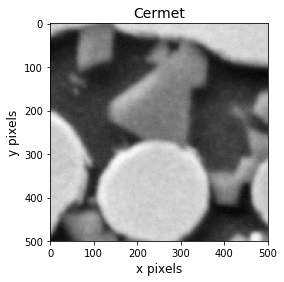

In [41]:
'''Generate a larger matrix from an image'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output
mtrx = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/images/cermet.png',format='png')
m_mtrx = mtrx[:,:]
plt.figure(1)              # create a figure placeholder
plt.imshow( m_mtrx,cmap='gray')
plt.title('Cermet',fontsize=14)
plt.xlabel('x pixels',fontsize=12)
plt.ylabel('y pixels',fontsize=12)
print('M shape =', m_mtrx.shape)

In [42]:
'''Larger matrix determinant'''

det_m_mtrx = np.linalg.det( m_mtrx )    # determinant
print('max(M) =',m_mtrx.max())
print('min(M) =',m_mtrx.min())

print('det(M) = %10.3e (not an insightful number)'%det_m_mtrx) # formatting numeric output

print('rank(M) = ',np.linalg.matrix_rank( m_mtrx, tol=1e-5 ) )

max(M) = 0.8901961
min(M) = 0.0627451
det(M) =  0.000e+00 (not an insightful number)
rank(M) =  500


Let's *solve* for this matrix with $\cvec$ as the right side vector, that is, $\Mmtrx\,\xvec = \cvec$.

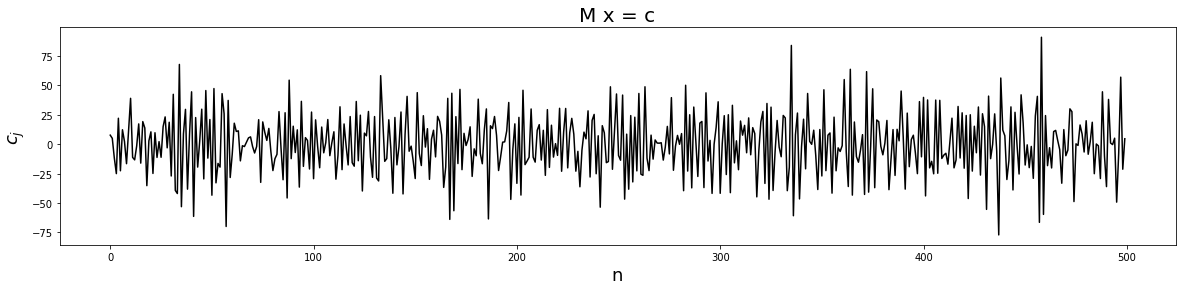

In [43]:
'''Solve M x = c and plot x'''

c_vec = np.random.random(mtrx.shape[0]) # any c will do it

sol = linalg.solve( m_mtrx, c_vec ) # solve linear system for A, b

plt.figure(2)
plt.plot(range(c_vec.size),sol,'k')
plt.title('M x = c',fontsize=20)
plt.xlabel('n',fontsize=18)
plt.ylabel('$c_j$',fontsize=18)
print('')

In [44]:
res_vec = c_vec - m_mtrx @ sol
#print('c - M x =',res_vec)
print('||c - M x|| =%12.4e'%linalg.norm( res_vec ))

||c - M x|| =  4.6664e-12


### $\Lmtrx$ <a id="l"></a> forward solve
A lower triangular matrix allows for a forward solve.

In [45]:
'''L forward solve'''
l_mtrx = np.array( [[1, 0, 0],   # per course notes 
                    [2, 3, 0],
                    [4, 5, 6]] )

b_vec = np.array( [1,2,3] )

x_vec = np.linalg.solve( l_mtrx, b_vec )

np.set_printoptions(precision=3) # one way to control printing of numpy arrays
print('x = ',x_vec)

x =  [ 1.000e+00 -1.110e-17 -1.667e-01]


### $\Umtrx$ <a id="u"></a> backward solve
An upper triangular matrix allows for a backward solve.

In [46]:
'''U backward solve'''
u_mtrx = np.array( [[1, 2, 3],   # per course notes
                    [0, 4, 5],
                    [0, 0, 6]] )

b_vec = np.array( [1,2,3] )

x_vec = np.linalg.solve( u_mtrx, b_vec )

np.set_printoptions(precision=3) # one way to control printing of numpy arrays
print('x = ',x_vec)

x =  [-0.25  -0.125  0.5  ]


### $\Pmtrx\,\Lmtrx\,\Umtrx$ <a id="lu"></a> factorization
The factors: $\Pmtrx$, $\Lmtrx$, and $\Umtrx$ where $\Pmtrx\,\Lmtrx\,\Umtrx = \Amtrx$ can be obtained from the SciPy linear algebra package:

In [47]:
'''L factor of A'''

from scipy import linalg

a_mtrx = np.array( [[1, 2,  3],
                    [4, 5,  6],
                    [7, 8, 10]] )

(p_mtrx, l_mtrx, u_mtrx) = linalg.lu(a_mtrx)

print('P =\n',p_mtrx)
print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('Checking...')
print('PLU - A =\n', p_mtrx @ l_mtrx @ u_mtrx - a_mtrx)

P =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L =
 [[1.    0.    0.   ]
 [0.143 1.    0.   ]
 [0.571 0.5   1.   ]]
U =
 [[ 7.     8.    10.   ]
 [ 0.     0.857  1.571]
 [ 0.     0.    -0.5  ]]
Checking...
PLU - A =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [50]:
help(linalg.lu)

Help on function lu in module scipy.linalg.decomp_lu:

lu(a, permute_l=False, overwrite_a=False, check_finite=True)
    Compute pivoted LU decomposition of a matrix.
    
    The decomposition is::
    
        A = P L U
    
    where P is a permutation matrix, L lower triangular with unit
    diagonal elements, and U upper triangular.
    
    Parameters
    ----------
    a : (M, N) array_like
        Array to decompose
    permute_l : bool, optional
        Perform the multiplication P*L  (Default: do not permute)
    overwrite_a : bool, optional
        Whether to overwrite data in a (may improve performance)
    check_finite : bool, optional
        Whether to check that the input matrix contains only finite numbers.
        Disabling may give a performance gain, but may result in problems
        (crashes, non-termination) if the inputs do contain infinities or NaNs.
    
    Returns
    -------
    **(If permute_l == False)**
    
    p : (M, M) ndarray
        Permutation matr

In [49]:
'''PLU x = b; that is: Forward: L y = P^-1 b, Backward: U x = y '''

y_vec = linalg.solve(l_mtrx, p_mtrx.transpose() @ b_vec) # L y = P^T b

x_vec = linalg.solve(u_mtrx, y_vec)                      # U x = y

print('x =', x_vec)

x_vec_gold = linalg.solve( a_mtrx, b_vec )    # solution using A x = b
print('||x - x_gold|| =',linalg.norm(x_vec-x_vec_gold))

x = [-3.333e-01  6.667e-01  3.172e-17]
||x - x_gold|| = 0.0
